In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import egsm_module as egsm
import egsm_Helper as h
import healpy as hp
import glob

In [ ]:
### Tutorial

In [4]:
EGSM_lowCM = glob.glob('data/low_basismapm*.npz')
EGSM_highCM = glob.glob('data/high_basismapm*.npz')

EGSM_MONOPOLE = 'data/egsm_monopole_mjyr.npz'
EGSM_LOW_DATASET = {'parameters': 'data/egsm_lowparameters.npz', 'nmf_templates': EGSM_lowCM, 'evidence':'data/egsm_lowevidence.npz'}
EGSM_HIGH_DATASET = {'parameters': 'data/egsm_highparameters.npz', 'nmf_templates': EGSM_highCM, 'evidence':'data/egsm_highevidence.npz'}
TEMP_UNITS = ['MJysr', 'TCMB', 'TRJ']
FREQ_UNITS = ['Hz','MHz', 'GHz']
FREQ_CUTOFF = 22.8

In [17]:
lowegsm=egsm.eGSM_map(EGSM_LOW_DATASET, freq_unit='MHz', map_unit='MJysr' )

/Users/Doyeon/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Doyeon/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  6.05535731e-06,   3.34713216e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 76, 'nit': 22, 'warnflag': 2}
  " state: %s" % convergence_dict)


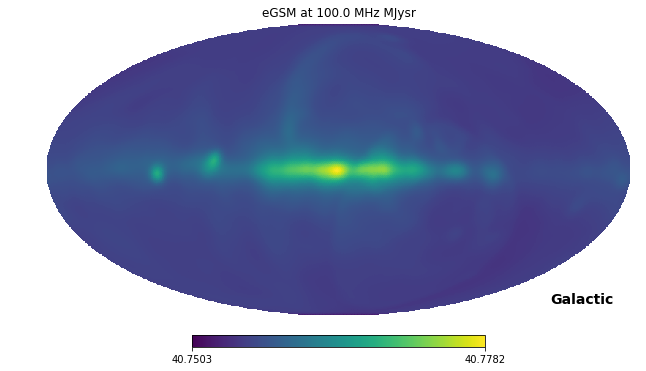

In [18]:
lowegsm.generate_map(100, resol=0.08, GP=True)
lowegsm.show_map(multiview=True, norm_opt='')

In [13]:
highegsm = egsm.eGSM_map(EGSM_HIGH_DATASET, freq_unit='GHz', map_unit='TCMB' )

/Users/Doyeon/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Doyeon/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  5.11086027e-06,  -1.14689393e-04]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/Doyeon/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  5.06419256e-06,  -1.29048687e-03]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/Doyeon/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b termi

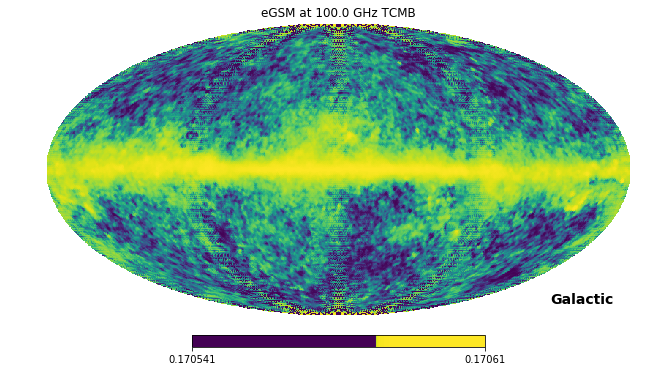

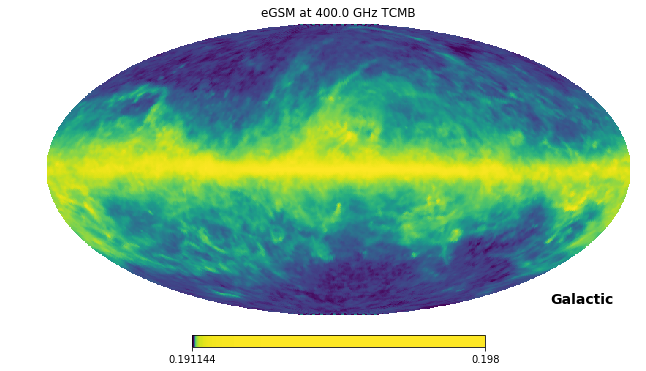

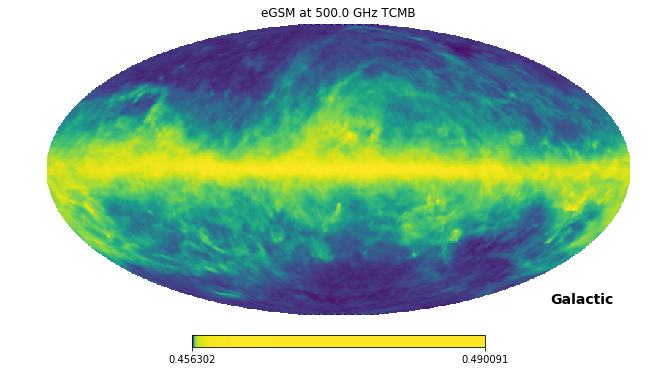

In [14]:
highegsm.generate_map([100,400,500], resol=0.02, GP=True)
highegsm.show_map(multiview=True)

/Users/Doyeon/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:859: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[np.isinf(val.data)] = -np.inf


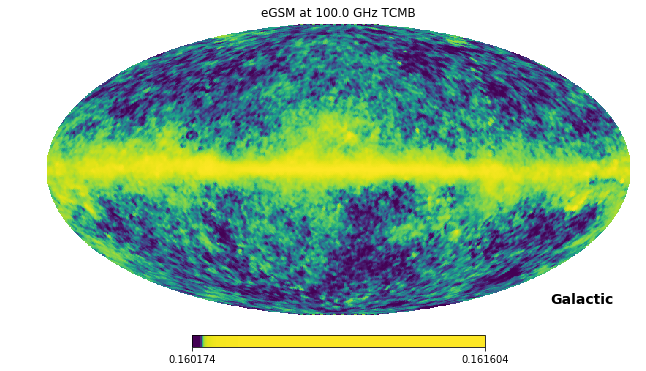

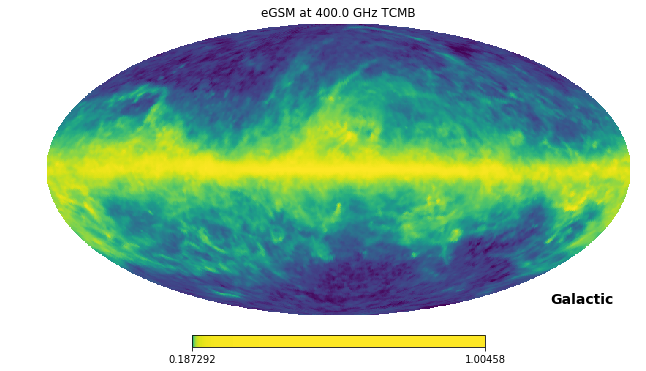

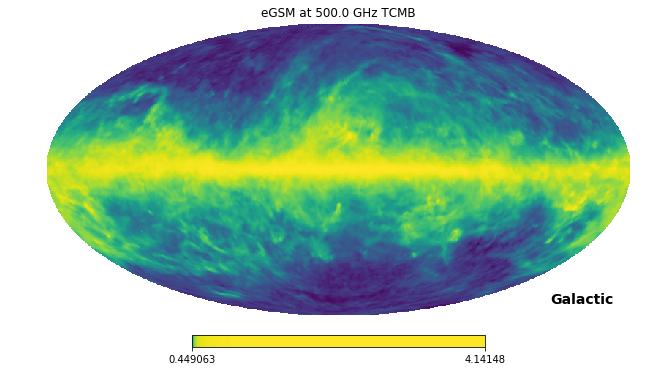

In [16]:
## LINEAR interpolation version
highegsm.generate_map([100,400,500], resol=0.02, GP=False)
highegsm.show_map(multiview=True)

## Now onto the core class

- core class calls the dataset because it allows the customization of the input data

In [9]:
pevid = np.load(EGSM_HIGH_DATASET['evidence'])['peak']
pset = EGSM_HIGH_DATASET['parameters']

In [12]:
ecore = egsm.egsm_CORE(pset,pevid, freq_unit='GHz')

In [14]:
C, M = ecore.compute_NMFtemplates()

Current Chi2=4566439.6322, Previous Chi2=57473247418775.4688, Change=100.0000% @ niters=0
Took 0.014 minutes to reach current solution.
Current Chi2=4759100.1021, Previous Chi2=96222869882078.0625, Change=100.0000% @ niters=0
Current Chi2=4529921.8860, Previous Chi2=4530716.8449, Change=0.0175% @ niters=20
Current Chi2=4506702.3738, Previous Chi2=4508261.6874, Change=0.0346% @ niters=40
Current Chi2=4466842.9645, Previous Chi2=4469172.4113, Change=0.0521% @ niters=60
Current Chi2=4416741.5300, Previous Chi2=4419307.8479, Change=0.0581% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.195 minutes to reach current solution.
Current Chi2=4757174.9732, Previous Chi2=138440987591070.4219, Change=100.0000% @ niters=0
Current Chi2=4509768.7201, Previous Chi2=4513050.1309, Change=0.0727% @ niters=20
Current Chi2=4421279.1635, Previous Chi2=4426883.6918, Change=0.1266% @ niters=40
Current Chi2=4302679.2600, Previous Chi2=4308625.1558, Change=0.1380% @ niters=60
Cur

Current Chi2=45141.2187, Previous Chi2=46467.1098, Change=2.8534% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.403 minutes to reach current solution.


In [ ]:
skymodel = ecore.model_optimalsky()

In [ ]:
n_mcsamples = 10
C_mc = []
M_mc = []
for i in range(n_mcsamples)
    Ci, Mi = ecore.generate_MCtemplates(seed=i)
    C_mc.append(Ci)
    M_mc.append(Mi)

In [ ]:
#map prediction at 50MHz
ecore.interpolate_sky(50) 

### To separately build monopole model without running model_optimalsky

In [ ]:
ecore.compute_monotemplates(nmode=3)

In [ ]:
ecore.model_monopole()